<a href="https://colab.research.google.com/github/afrahriyaz/TensorFlow/blob/main/neural_network_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intoduction to Regression with Neural Networks in TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


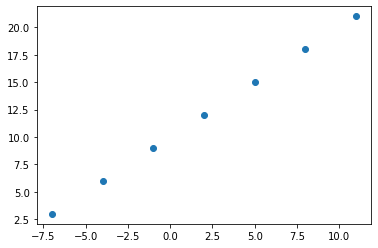

In [ ]:
#creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0])
#create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0])
#visualize it
plt.scatter(X,Y);

In [ ]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True])

##input and output shapes

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
#turn our numpy arrays into tensor
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

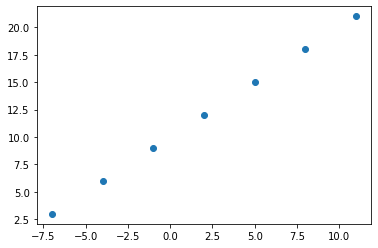

In [ ]:
plt.scatter(X,Y)

##Modelling with tensorflow

In [11]:
#set random seed for reproducibility
tf.random.set_seed(42)

#create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 441ms/step - loss: 10.8599 - mae: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 10.8099 - mae: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 10.7599 - mae: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 10.7099 - mae: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.6599 - mae: 10.6599


In [12]:
#check x and y
X, Y

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.])>)

In [14]:
#try n make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[11.441017]], dtype=float32)

In [15]:
y_pred + 10.6

array([[22.041018]], dtype=float32)

##Improving our model

In [16]:
#rebuilding the model
#create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")
#fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 10.6983 - mae: 10.6983
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6483 - mae: 10.6483
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5983 - mae: 10.5983
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5483 - mae: 10.5483
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4983 - mae: 10.4983
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4483 - mae: 10.4483
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3983 - mae: 10.3983
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3483 - mae: 10.3483
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2983 - mae: 10.2983
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2483 - mae: 10.2483
Epoch 11/100
1/1 [==============================] - 0s 8m

In [18]:
#lets see if prediction has improved
model.predict([17.0])

array([[32.099113]], dtype=float32)

In [22]:
#more changes
#create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics="mae")
#fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 11.3083 - mae: 11.3083
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8640 - mae: 10.8640
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4128 - mae: 10.4128
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9543 - mae: 9.9543
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4872 - mae: 9.4872
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0103 - mae: 9.0103
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5224 - mae: 8.5224
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0223 - mae: 8.0223
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5086 - mae: 7.5086
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6247 - mae: 7.6247
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [23]:
X,Y

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.])>)

In [24]:
model.predict([17.0])

array([[27.471008]], dtype=float32)

##Evaluating our model

In [25]:
#make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
#make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

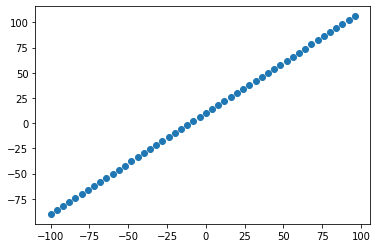

In [29]:
#visualizing the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [30]:
len(X)

50

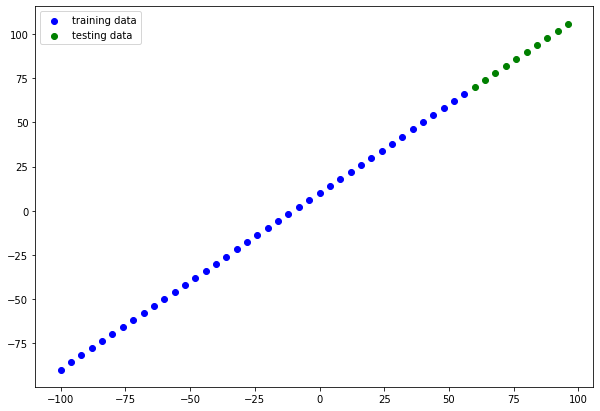

In [32]:
#split data into traning and test data
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

#visualizing training and test data
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, y_train, c='b', label="training data")
#plot test data in red
plt.scatter(X_test, y_test, c='g', label="testing data")
#show a legend
plt.legend()

In [73]:
tf.random.set_seed(42)
#create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1,name="output_layer")
], name="model_1")
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [74]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [75]:
#fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)

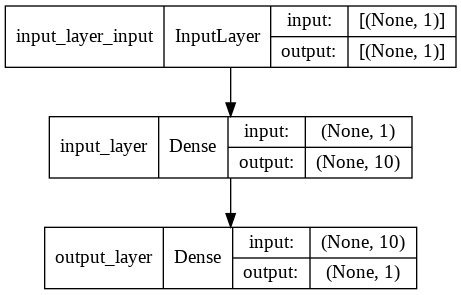

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

##visualizing our model's predictions

In [77]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [78]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [79]:
#lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data and test data, compares predictions to true val
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label="training data")
  plt.scatter(test_data,test_labels,c='g',label="testing data")
  plt.scatter(test_data,predictions,c='r',label="predicted data")
  plt.legend();

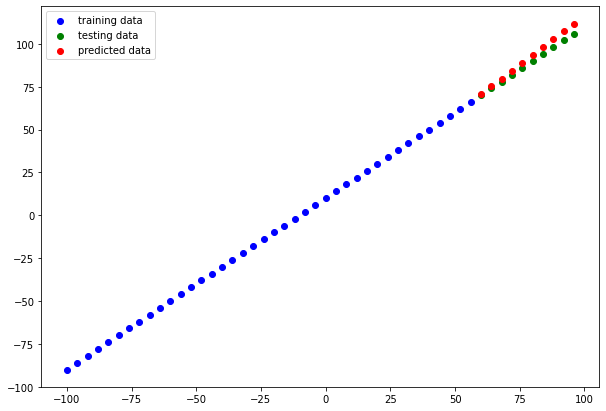

In [80]:
plot_predictions()